# Summary 

Crib for Examples Paper 1 for the Part IA computing course. See end of notebook for license.

# Question 1

(a) A `dictionary`. We want to look-up telephone numbers by name, so names could be used as keys, and telephone numbers would be the values.

(b) A `list` of `tuples`. A tuple would be suitable for holding the data for each vehicle 
(since this data cannot change), and a list could hold the tuples for each vehicle.

(c) A NumPy array. Since the data is numerical and the intention is to perform statistical analysis, a NumPy array would be suitable.

# Question 2

Using $n$ bits, the greatest positive integer that can be stored is $2^{n-1}-1$ (the exponent is $n-1$ rather than $n$ because one bit is used to store the sign). Therefore, for a positive number $x$, the number required bits $n$ is 
$$
n = \log_{2}(x + 1) + 1,
$$
with $n$ then rounded up to the nearest integer. 

For a negative number, the greatest negative integer than can be stored is 
$-2^{n-1}$. This is different (by one) from the positive integer case because, 
in simple terms, the standard practice is to consider 
'$+0$' to be zero, and '$-0$' to be $-1$. This means that for a fixed number of bits, 
the absolute value of greatest negative integer that can be stored is one more than the
greatest positive integer that could be stored. For negative numbers:
$$
n = \log_{2}\left(\left| x \right|\right) + 1,
$$
with $n$ then rounded up the nearest integer.

(a) 7 bits ($\log_{2}(48 + 1) + 1 \approx 6.6$)

(b) 7 bits ($\log_{2}(48) + 1 \approx 6.6$)

(c) 33 bits ($\log_{2}(2500455245 + 1) + 1 \approx 32.2$)

(d) 4 bits ($\log_{2}(8) + 1 = 4$)

# Question 3

The issue is that if the value of the least significant digit in $x^{2}$ is greater than 1, then $x^{2} + 1$ will evaluate to $x^{2}$. The denominator will then be zero.

(a) $n = 3$ 

- Since $(10^{3})^{2} = 10^{6}$, with 7 significant digits the addition of 1 will not be lost.
- Since $(10^{4})^{2} = 10^{8}$, with 7 significant digits the addition of 1 will be lost.

(b) $n = 7$ 

- Since $(10^{7})^{2} = 10^{14}$, with 15 significant digits the addition of 1 will not be lost.
- Since $(10^{8})^{2} = 10^{16}$, with 15 significant digits the addition of 1 will be lost.

The accuracy of the computations is a separate disucssion. 

## Extension 

The above can be tested numerically. This in an extension to the exercise. 

In [1]:
import numpy as np

# Evaluate x*2 + 1.0 using 32-bit floats

# This retains the 1 term
x = np.float32(1.0e3)
a = np.float32(x**2) + np.float32(1.0)
print("Using 32-bit float and n=3:\n {:f}".format(a))

# The 1 term is now lost
x = np.float32(1.0e4)
a = np.float32(x**2) + np.float32(1.0)
print("Using 32-bit float and n=4:\n  {:f}".format(a))

# Evaluate x*2 + 1.0 using 64-bit floats

# This retains the 1 term
x = np.float64(1.0e7)
a = np.float64(x**2) + np.float64(1.0)
print("Using 64-bit float and n=7:\n  {:f}".format(a))

# The 1 term is now lost
x = np.float64(1.0e8)
a = np.float64(x**2) + np.float64(1.0)
print("Using 64-bit float and n=8:\n  {:f}".format(a))

Using 32-bit float and n=3:
 1000001.000000
Using 32-bit float and n=4:
  100000000.000000
Using 64-bit float and n=7:
  100000000000001.000000
Using 64-bit float and n=8:
  10000000000000000.000000


# Question 4

The point of interest in this question is how the relative error propagates though the problem. If an operation is stable, the relative error in the 'result' will be comparable to the relative error in the 'input'. 

(a) $10x$

\begin{equation}
e 
= \frac{\left|10 x - 10 x (1 + \epsilon_{x})\right|}{\left|10x\right|} 
= \left| \epsilon_{x} \right| 
\le \epsilon
\end{equation}

This problem is stable with respect to round-off error, i.e. the relative error does not grow.

(b) $xy$

\begin{align}
e  &= \frac{\left|xy - x(1 + \epsilon_{x})y(1 + \epsilon_{y})\right|}{\left|xy\right|} 
\\ &= \frac{\left|xy - xy - xy \epsilon_{x} - xy \epsilon_{y} - xy \epsilon_{x}  \epsilon_{y}\right|}{\left|xy\right|}
\end{align}

Since $\epsilon$ is small ($\epsilon \ll 1$), drop the $\epsilon_{x}  \epsilon_{y}$ term, which leads to:

$$
e  = \left| \epsilon_{x} + \epsilon_{y} \right|  \le 2 \epsilon
$$

This problem is stable with respect to round-off error, i.e. the growth in the relative error is bounded.

(c) $x/y$

\begin{align}
e  &= \frac{|x/y - x(1 + \epsilon_{x})/(y(1 + \epsilon_{y})) |}{|x/y|}
\\ &= \left| 1 - \frac{1 + \epsilon_{x}}{1 + \epsilon_{y}} \right| 
\\ &= \frac{\left| \epsilon_{y} - \epsilon_{x} \right|}{\left| 1 + \epsilon_{y} \right|}
\end{align}

Since $\epsilon_{y}$ is small,
$$
e  = \left| \epsilon_{x} - \epsilon_{y} \right| \le 2 \epsilon
$$
This problem is stable with respect to round-off error, i.e. the growth in the relative error is bounded.

(d) $x + y$

\begin{align}
e 
&= \frac{\left| x + y - x(1 + \epsilon_{x}) - y(1 + \epsilon_{y}) \right|}{\left| x + y \right|}
\\
&= \frac{\left| x \epsilon_{x} + y \epsilon_{y} \right|}{\left|x + y \right|} 
\end{align}

Unlike the previous problems, we still have the expression of interest, $x + y$, in the denominator.
If $|x + y|$ is large, then the denominator will be large
compared to the numerator and the error will not grow substantially.

However, we have
$$
e 
\le \frac{\epsilon\left( \left| x \right|  + \left| y \right| \right)}{\left|x + y \right|}.
$$
If $y$ is close to $-x$, the denominator becomes small and the relative error increase dramatically, especially for large $\left |x \right|$.

The key result is that computing $x - y$ when $x \approx y$ can lead to large relative errors.

# Question 5

(a) Computing $2 \boldsymbol{u}$ involves $n$ multiplications ($O(n)$), and summing $2 \boldsymbol{u}$ and $\boldsymbol{v}$ involves $n$ additions ($O(n)$). Complexity is therefore $O(n)$.

(b) Computing $\boldsymbol{c} = \boldsymbol{B} \boldsymbol{u}$ involves $n^{2}$ add-multiply operations ($O(n^{2})$). To compute  $\boldsymbol{A} \boldsymbol{c}$, the number of operations is $n^{2}$ ($O(n^{2})$). Adding two vectors is $O(n)$. Complexity is therefore $O(n^{2})$.

If $\boldsymbol{A}\boldsymbol{B}$ was computed first, the number of operations would be $n^{3}$ ($O(n^{3})$), followed by $n^{2}$ operations for the matrix-vector products. Complexity would therefore be $O(n^{3})$.
This demonstrates that the order in which mathematical operations are performed can affect complexity.

(c) Sum all entries ($n$ additions, ($O(n)$)) and divide by length of vector (one operation, ($O(1)$)). Complexity is $O(n)$.

(d) Sum all entries ($mn$ additions, which is $O(mn)$) and divide by number of entries in the matrix ($O(1)$), then for each entry subtract the entry from the mean value, square and sum ($O(mn)$. Final step is division by total number of entries and take square root ($O(1)$). Complexity is therefore $O(mn)$. 

# Question 6

The analyical solution is:

$$
\int_{0}^{10} x^{3} + x^{2} \, dx = \left. \frac{x^{4}}{4} + \frac{x^{3}}{3} \right|^{10}_{0} =\frac{8500}{3}
$$

First step is to implement a function that performs numerical integration given a function $f$ to be integrated, integration limits ($a$ and $b$), integration points $x_{i}$ and integration weights $w_{i}$:

In [2]:
def integrate(f, a, b, x, w):

    # Iterate over all integration points
    integral = 0.0

    for i in range(len(x)):
        integral += f(x[i])*w[i]

    # A 'neater' implementation would be use 'zip'    
    #for xi, wi in zip(x, w):  # zip allows iteration over x and w at the same time
    #    integral += f(xi)*wi

    return (b - a)*integral

In an examination the above could be expressed in Python-like pseudo-code.

We now define the function of interest and the integration limits:

In [3]:
# Equation of interest
def f(x):
    return x**3 + x**2

# Limits
a, b = 0, 10

exact_solution = 8500/3 

## Trapezoidal rule

In [4]:
# Points and weights
x = (a, b)
w = (0.5, 0.5)

# Integrate
integral = integrate(f, a, b, x, w) 

# Display output
print("Numerical integral:", integral)
print("Error:             ", abs(integral - exact_solution))

Numerical integral: 5500.0
Error:              2666.6666666666665


## Simpson's rule

In [5]:
# Points and weights
x = (a, (a + b)/2, b)
w = (1/6, 2/3, 1/6 )

# Integrate
integral = integrate(f, a, b, x, w) 

# Display output
print("Numerical integral:", integral)
print("Error:             ", abs(integral - exact_solution))

Numerical integral: 2833.333333333333
Error:              4.547473508864641e-13


Simpson's rule is the three-point rule from the Newton-Cotes family of schemes. 

## Gauss quadrature (two-point)

In [6]:
import math

# Points and weights
x = ((a+b)/2 - (b-a)/(2*math.sqrt(3)), 
     (a + b)/2 + (b - a)/(2*math.sqrt(3)))
w = (1/2, 1/2)

# Integrate
integral = integrate(f, a, b, x, w) 

# Display output
print("Numerical integral:", integral)
print("Error:             ", abs(integral - exact_solution))

Numerical integral: 2833.333333333334
Error:              4.547473508864641e-13


Gauss quadrature is a family of numerical integration schemes that with $n$ points can integrate a polynomial of degree $2n -1 $ exactly.

## Improving accuracy

Using the above schemes, accuracy could be improved by breaking the integration domain $(a, b)$ into smaller pieces:

$$
\int_{a}^{b} f \, dx 
\approx 
(x_{1} -a) \sum_{i=0}^{n-1} w_{i} f(x_{i}) + (x_{2} - x_{1}) \sum_{i=0}^{n-1} w_{i} f(x_{i}) + \dots + (b - x_{j}) \sum_{i=0}^{n-1} w_{i} f(x_{i}).
$$

The values of $x_{i}$ need to be re-mapped for the smaller intervals.

# Question 7

(a) The equation is
second-order, constant coefficient and homogeneous. Using the usual approach, the general solution is

$$
x = A \cos(\omega t) + B \sin(\omega t),
$$

where $\omega = \sqrt{k/m}$. Using the initial conditions $x(0) = 0.01$ and $\dot{x}(0) = 0$, the exact solution is:

$$
x = 0.01 \cos(\omega t).
$$


(b) The approximation of the second derivative is

$$
\ddot{x}_{n} \approx \frac{x_{n-1} - 2 x_{n} + x_{n+1}}{\Delta t^{2}},
$$

and inserting this into the equation we want to solve,

$$
m \ddot{x}_{n} + k x_{n} = F_{n},
$$

we get:

$$
m \frac{x_{n-1} - 2 x_{n} + x_{n+1}}{\Delta t^{2}} + k x_{n} = F_{n}
$$

Re-arranging to isolate $n+1$ terms of the the left-hand side and moving the remaining terms 
to the right-hand side:

$$
x_{n+1} = \frac{\Delta t^{2}}{m} F_{n} - \frac{\Delta t^{2} k}{m} x_{n} + 2 x_{n} - x_{n-1}.
$$

Now, if we know all terms at time $t_{n}$ and $t_{n-1}$, we can compute $x_{n+1}$ and then advance $n$.

The task is to turn the expression for computing $x_{n+1}$ into a working algorithm/program.
We first set-up the necessary data:

In [7]:
import numpy as np

# Time step
dt = 0.01

# Times t_0, t_1, ety
T = np.arange(0, 20, dt)

# Mass and spring stiffness
m, k = 1, 40

# Create NumPy array to hold the solution x_n
x = np.zeros(len(T))

# Set the intial conditions
x[0], x[1] = 0.01, 0.01

We now compute $x_{n}$, starting at $x_{2}$ because $x_{0}$ and $x_{1}$ were set by the initial conditions. 

In [8]:
F = 0
for n in range(2, len(T)):
    x[n] = (dt*dt/m)*F - (dt*dt*k/m)*x[n-1] + 2*x[n-1] - x[n-2]  

We evaluate the exact solution at each $t_{n}$:

We now plot the numerical and analytical solutions:

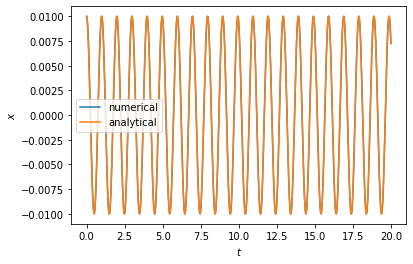

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exact solution
w = np.sqrt(k/m)
x_exact = 0.01*np.cos(w*T)

# Plot
plt.plot(T, x, label='numerical')
plt.plot(T, x_exact, label='analytical');

# Add labels and legend
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.figure();

You could try changing the time step to see the effect

(c) We now need to add a right-hand side term (friction) that depends in the direction of motion (and which is is given by the velocity).

We first create a function that given the velocity returns the friction force $F$:

In [10]:
def F(v):
    "Return friction force"
    if v < 0.0:
        return 0.025
    elif v > 0.0:
        return -0.025
    else:
        return 0.0

Using the difference equation to compute values of $x$:

In [11]:
for n in range(2, len(T)):
    # Compute (approximate) velocity (used to determine friction force)
    v = (x[n-1] - x[n-2])/dt

    # Compute x_n
    x[n] = (dt*dt/m)*F(v) - (dt*dt*k/m)*x[n-1] + 2*x[n-1] - x[n-2]  

We plot the response with friction, and compare to the analytical case without friction:

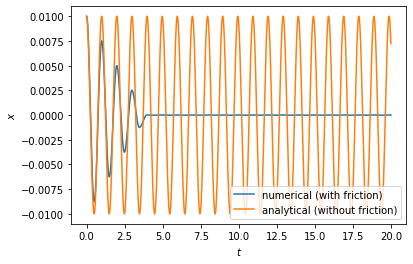

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(T, x, label='numerical (with friction)')
plt.plot(T, x_exact, label='analytical (without friction)');

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.figure();

# Question 8

We first implement Monte Carlo integration for a function $f$ of two variables over a rectangle $(-a, a) \times (-b, b)$:

In [13]:
import random

def integrate(f, a, b, N):
    # Loop over samples
    f_sum = 0.0
    for i in range(N):
        # Generate random point (xi, yi) that is inside the square (-a, a) x (-b, b)
        x = random.uniform(-a, a)      
        y = random.uniform(-b, b)

        # Evaluate function at the random points and sum
        f_sum += f(x, y)
    
    # Return mean of function value multiplied by area
    return (4*a*b)*f_sum/N  

In an exam the above could be expressed using pseudo-code.

A simple test is to integrate the function $f = 1$ on $(-1, 1) \times (-1, 1)$, which should be 4 (exactly) for any $N > 0$: 

In [14]:
def f(x, y):
    return 1.0

x0 = integrate(f, 1, 1, 100)
print(x0)

x1 = integrate(f, 1, 1, 1000)
print(x1)

4.0
4.0


(a) Declare the function we wish to integrate:

In [15]:
def f(x, y):
    return np.exp(x*y)*(np.cos(y)**2*np.sin(x**2))

Integrate using differing number of points:

In [16]:
integral = integrate(f, 1, 1, 100)
print("Approximate integral using 100 points:", integral)

integral = integrate(f, 1, 1, 10000)
print("Approximate integral using 10000 points:", integral)

integral = integrate(f, 1, 1, 100000)
print("Approximate integral using 100000 points:", integral)

Approximate integral using 100 points: 0.8080916190950365
Approximate integral using 10000 points: 0.9776060381785302
Approximate integral using 100000 points: 0.9765477041856181


Precise values will differ as they depend on the random number generator.

(b) To approximate $\pi$, we need to approximate the area of circle with radius $r=1$. We do this by approximately integrating a function that is equal to 1 inside the circle and zero outside: 

In [17]:
def f_circle(x, y):
    if x*x + y*y < 1.0:
        return 1.0
    else:
        return 0.0

Applying the Monte Carlo integration and computing the error for each case:

In [18]:
pi = integrate(f_circle, 1, 1, 100)
print("Approximate pi using 100 points:", pi)
print("Error:                          ", abs(pi - np.pi))

pi = integrate(f_circle, 1, 1, 10000)
print("Approximate integral using 10000 points:", pi)
print("Error:                          ", abs(pi - np.pi))

pi = integrate(f_circle, 1, 1, 100000)
print("Approximate integral using 100000 points:", pi)
print("Error:                          ", abs(pi - np.pi))

Approximate pi using 100 points: 3.24
Error:                           0.0984073464102071
Approximate integral using 10000 points: 3.1516
Error:                           0.010007346410207063
Approximate integral using 100000 points: 3.14092
Error:                           0.0006726535897931818


## Extension

The above implementation of the function `integrate` processes only one value at a time. When $N$ is very large, the evaluations become costly.

If the function `f` from part (a) is implemented using NumPy operators, e.g. `np.cos`, 
it can process many values at once.
Below is a re-implementation of `integrate` which generates random values at once, and then processes all values together in the function `f`:

In [19]:
import numpy as np

def integrate_vectorised(f, a, b, N):
    # Generate random point (xi, yi) that is inside the square (-a, a) x (-b, b)
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-b, b, N)

    # Evaluate at each point and sum
    f_sum = f(x, y).sum()
    
    return (4.0*a*b)*f_sum/N

Applying this implementation:

In [20]:
integral = integrate_vectorised(f, 1.0, 1.0, 100)
print("Approximate integral using 100 points:", integral)

integral = integrate_vectorised(f, 1.0, 1.0, 10000)
print("Approximate integral using 10000 points:", integral)

integral = integrate_vectorised(f, 1.0, 1.0, 100000)
print("Approximate integral using 100000 points:", integral)

integral = integrate_vectorised(f, 1.0, 1.0, 1000000)
print("Approximate integral using 1000000 points:", integral)

integral = integrate_vectorised(f, 1.0, 1.0, 10000000)
print("Approximate integral using 10000000 points:", integral)

Approximate integral using 100 points: 1.1029670688022255
Approximate integral using 10000 points: 0.9530838577834831
Approximate integral using 100000 points: 0.9677357264173464
Approximate integral using 1000000 points: 0.96904553954195
Approximate integral using 10000000 points: 0.9686691865934886


This version is much faster than the first version, and larger $N$ can be used to get a result in a reasonable time.

# Copyright and license

© Copyright 2016-2020 Garth N. Wells (<gnw20@cam.ac.uk>)

## Notebook text 

This work is licensed under the Creative Commons
Attribution-ShareAlike 4.0 International License. To view a copy of
this license, visit <http://creativecommons.org/licenses/by-sa/4.0/>.

## Notebook code

This work is licensed nder the MIT License. To view a copy of
this license, visit <https://opensource.org/licenses/MIT>.